In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import Symbol, diff,exp
import matplotlib as mpl
from ipywidgets import interactive
import ipywidgets as widgets
mpl.rc("font", family = "Noto Sans CJK TC")

## Loss Function
### $y = \frac{\exp^{-x}}{1+30x^2}+ \frac{\exp^{x}}{1+40x^2}-\frac{\exp^x}{1+0.3x^4}-\frac{\exp{x}}{1+0.01x^6}-\frac{\exp^{-x}}{1+0.2x^4}$

In [3]:
def f(x):
    y = np.exp(-x)/(1+30*x**2)+ np.exp(x)/(1+40*x**2)-np.exp(x)/(1+0.3*x**4)-np.exp(x)/(1+0.01*x**6)-np.exp(-x)/(1+0.2*x**4)
    return y

In [4]:
x = Symbol('x')
y = exp(-x)/(1+30*x**2)+ exp(x)/(1+40*x**2)-exp(x)/(1+0.3*x**4)-exp(x)/(1+0.01*x**6)-exp(-x)/(1+0.2*x**4)
df = diff(y,x)
'y = ' + str(df).replace('exp','np.exp')

'y = 0.06*x**5*np.exp(x)/(0.01*x**6 + 1)**2 + 1.2*x**3*np.exp(x)/(0.3*x**4 + 1)**2 + 0.8*x**3*np.exp(-x)/(0.2*x**4 + 1)**2 - 80*x*np.exp(x)/(40*x**2 + 1)**2 - 60*x*np.exp(-x)/(30*x**2 + 1)**2 - np.exp(x)/(0.01*x**6 + 1) - np.exp(x)/(0.3*x**4 + 1) + np.exp(-x)/(0.2*x**4 + 1) + np.exp(x)/(40*x**2 + 1) - np.exp(-x)/(30*x**2 + 1)'

In [5]:
def df(x):
    y = 0.06*x**5*np.exp(x)/(0.01*x**6 + 1)**2 + 1.2*x**3*np.exp(x)/(0.3*x**4 + 1)**2 + 0.8*x**3*np.exp(-x)/(0.2*x**4 + 1)**2 - 80*x*np.exp(x)/(40*x**2 + 1)**2 - 60*x*np.exp(-x)/(30*x**2 + 1)**2 - np.exp(x)/(0.01*x**6 + 1) - np.exp(x)/(0.3*x**4 + 1) + np.exp(-x)/(0.2*x**4 + 1) + np.exp(x)/(40*x**2 + 1) - np.exp(-x)/(30*x**2 + 1)
    return y

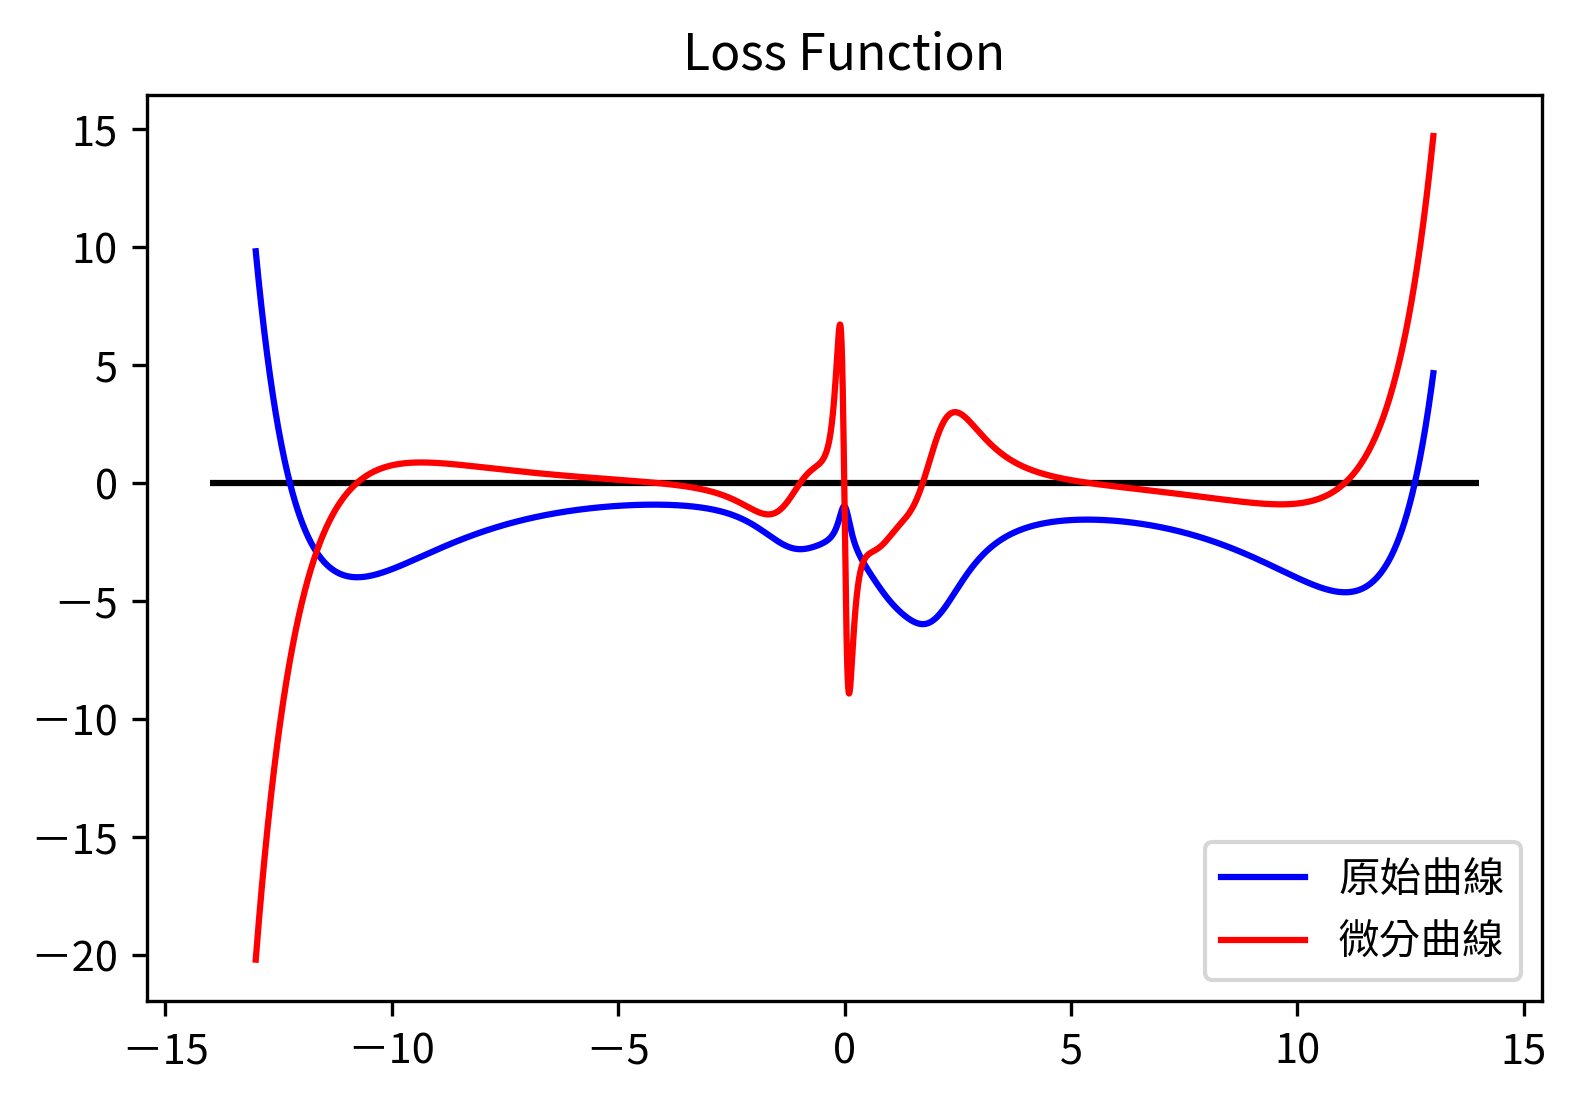

In [40]:
plt.figure(dpi=300)
plt.title("Loss Function")
x = np.linspace(-13,13,5000)
plt.plot(x,f(x), color='blue', label='原始曲線')
plt.plot(x,df(x),color='r', label='微分曲線')
plt.hlines(0,-14,14,'black')
plt.legend()

In [87]:
def Gradient_Descent(w=5,η=0.2,inter=50):
    plt.figure(dpi=300)
    x = np.linspace(-13,13,5000)
    plt.plot(x,f(x), color='blue', label='原始曲線')
    plt.scatter(w,f(w), c='g',label='起始點')
    for i in range(inter):
        w = w - η * df(w)
        if i == inter-1:
            plt.scatter(w,f(w), c='r', alpha=1/inter*i,label='結束點')
        else:
            plt.scatter(w,f(w), c='r', alpha=1/inter*i)
    plt.legend()
p = interactive(Gradient_Descent, w=(-11,11), η=(0.01,1.5), inter=(1,1000))

In [88]:
p

interactive(children=(IntSlider(value=5, description='w', max=11, min=-11), FloatSlider(value=0.2, description…

## 結果呈現
![](https://i.imgur.com/grjnYoO.gif)